# Soren Stenback - 56957228

## Does Country Of Origin Affect Family History Of Mental Illness?

It is my theory that a person's country of origin may affect their answers in the survey collected as data for this project. As an example, Bulgaria is a former Soviet-bloc nation and did not have a very good mental health service for many years. People who answered the survey and are from Bulgaria may answer 'no' to a family history of mental illness not because it is true but because they simply do not have the records.

In [4]:
#Import required libraries
import pandas as pd

---

# Milestone 2

## Task 4 - Load your dataset from a file or URL

In [5]:
#Load raw data into a dataframe
rawDataframe = pd.read_csv('../data/raw/dataRaw.csv')

---

# Milestone 3

## Task 1 - Conduct an Exploratory Data Analysis (EDA) on your dataset

In [6]:
#Get the columns of the raw data and the number of columns
rawDfColumns = list(rawDataframe.columns)
print(f"Columns: {rawDfColumns}")
print(f"Column count: {len(rawDfColumns)}")


Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']
Column count: 27


As shown above and in the [data source](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey), there are 27 columns in the raw data: 
1. Timestamp of the individual's survey
2. Age of the individual
3. Gender of the individual
4. Country of origin of the individual
5. US state of origin of the individual if applicable
6. Whether or not the individual is self-employed
7. Whether the individual has a history of mental illness
8. Whether or not the individual has sought treatment for mental health
9. Whether the individual believes their mental health interferes with their work
10. The number of employees at the individual's company
11. Whether the individual works remotely (outside of an office) at least 50% of the time
12. Whether the individual's employer is a primarily tech company
13. Whether the individual's employer provides mental health benefits
14. Whether the individual is aware of their employer's mental health care options
15. Whether the individual's employer has ever discussed a mental health wellness program
16. Whether the individual's employer provides resources on how to seek help for mental health
17. Whether the individual is able to use company resources for mental health anonymously
18. The difficulty of taking mental health leaves at the individual's company
19. Whether the individual thinks discussing mental health with their employer will have negative connotations
20. Whether the individual thinks discussing physical health with their employer will have negative connotations
21. Whether the individual would be willing to discuss mental health with their coworkers
22. Whether the individual would be willing to discuss mental health with their direct supervisor
23. Whether the individual would bring up mental health issues during an interview with a possible employer
24. Whether the individual would bring up physical health issues during an interview with a possible employer
25. Whether the individual believes their employer takes mental health as seriously as physical health
26. Whether the individual has heard of or observed any negative consequences with mental health conditions in their workplace
27.  Any additional comments

In [7]:
#Call the unique values in the first few columns
print(rawDataframe.Timestamp.unique())
print(rawDataframe.Age.unique())
print(rawDataframe.Gender.unique())
print(rawDataframe.Country.unique())

['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' '

We can see above that there are a variety of custom values entered into the surveys. We will need to clean up the data, as well as trim down the columns to what we need for our research question.

As the research question above specifically relates to history of illness, we can strip down most of the columns about the workplaces specifically. We will want to keep the data on the individuals themselves, such as gender and age, as well as the vital information on country of origin and family history of mental health. Other columns can be removed from the dataframe and a new dataset created.

In [8]:
#Use the list of columns above to cut all but 'Age', 'Gender', 'Country', and 'family_history'
resQuesDf = rawDataframe.drop(columns=['Timestamp', 'state', 'self_employed', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments'])

Now that we have cut down our dataframe to only the relevant columns, we need to clean up the data inside those columns. By identifying misspelled values or 'joke' entries we can clean them up into relevant data and ensure that we will not encounter any strange data while processing and analysing.

In [9]:
#Create a list of each unique gender entry and what they need to be converted to
convertGenderList = [('Female','Female'),('M','Male'),('Male','Male'),('male','Male'),('female','Female'),('m','Male'),('Male-ish','Male'),('maile','Male'),('Trans-female','Female'),('Cis Female','Female'),('F','Female'),('something kinda male?','Male'),('Cis Male','Male'),('Woman','Female'),('f','Female'),('Mal','Male'),('Male (CIS)','Male'),('queer/she/they','Genderqueer'),('non-binary','Non-Binary'),('Femake','Female'),('woman','Female'),('Make','Male'),('Nah','Non-Binary'),('All','Genderqueer'),('Enby','Non-Binary'),('fluid','Genderqueer'),('Genderqueer','Genderqueer'),('Female ','Female'),('Androgyne','Genderqueer'),('Agender','Non-Binary'),('cis-female/femme','Female'),('Guy (-ish) ^_^','Male'),('male leaning androgynous','Genderqueer'),('Male ','Male'),('Man','Male'),('Trans woman','Male'),('msle','Male'),('Neuter','Non-Binary'),('Female (trans)','Female'),('queer','Genderqueer'),('Female (cis)','Female'),('Mail','Male'),('cis male','Male'),('A little about you','Genderqueer'),('Malr','Male'),('p','Genderqueer'),('femail','Female'),('Cis Man','Male'),('ostensibly male, unsure what that really means','Male')]
#Convert each value in the 'Gender' column to one of the default selections; Male, Female, Non-Binary, Genderqueer
for item in convertGenderList:
    resQuesDf['Gender'].replace(*item,inplace=True)
#Get row numbers for rows whose ages are less than 18 and more than 120, as values outside this range are not acceptable
invalidAgeList = list(resQuesDf.loc[(resQuesDf['Age'] < 18) | (resQuesDf['Age'] > 120)].index)
#Set the value of 'Age' in each of the invalid row indexes to be 'NA'
resQuesDf.loc[invalidAgeList,'Age'] = 'NA'

Now that the data has been cleaned up, we will save it to a new processed csv file for safekeeping.

In [11]:
#Write the dataframe to a CSV file in data/processed
resQuesDf.to_csv('../data/processed/sstenbackResearchQuestionData.csv',index=False)

We now want to visualise the data in several different graphs based on multiple datapoints.
+ Correlation between age ranges and family history of mental illness
+ Correlation between country of origin and family history of mental illness

In [57]:
#Create a new dataframe for age ranges and family history
#Set the index and variables
from calendar import c


ageRanges = ['11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
ageYesCount = [0]*len(ageRanges)
ageNoCount = [0]*len(ageRanges)
agePercentageYes = [0]*len(ageRanges)
#Iterate through the age ranges and calculate the yes and no counts
for item in ageRanges:
    #Create the maximum and minimum age variables and get the current index
    minAge = int(item[0]+item[1])
    maxAge = int(item[3]+item[4])
    currentIndex = ageRanges.index(item)
    #Iterate through each row of the dataframe
    for x in range(len(resQuesDf)):
        #Get the individual's age
        dataAge = resQuesDf.iloc[x]['Age']
        #Check is the age is valid
        if(dataAge != 'NA'):
            #If the age is within the range for this age group, increment either yes or no to family history
            if(int(dataAge) >= minAge and int(dataAge) <= maxAge):
                if(resQuesDf.iloc[x]['family_history'] == 'Yes'):
                    ageYesCount[currentIndex] += 1
                else:
                    ageNoCount[currentIndex] += 1
    try:
        agePercentageYes[currentIndex] = str(round((ageYesCount[currentIndex]/(ageYesCount[currentIndex]+ageNoCount[currentIndex]))*100,2)) + '%'
    except ZeroDivisionError:
        if(ageYesCount[currentIndex]+ageNoCount[currentIndex] == 0):
            agePercentageYes[currentIndex] = '0%'
#Create a new dataframe for age ranges and family history correlation
ageToFamHistDf = pd.DataFrame({'Family History':ageYesCount,'No Family History':ageNoCount,'Percentage With Family History':agePercentageYes},index=ageRanges)
#Save the new dataframe to a csv file
ageToFamHistDf.to_csv('../data/processed/sstenbackAgeToFamHist.csv')

In [58]:
#Create a new dataframe for countries and family history
#Set the index and variables
countryList = list(resQuesDf.Country.unique())
countryYesCount = [0]*len(countryList)
countryNoCount = [0]*len(countryList)
countryPercentageYes = [0]*len(countryList)
#Iterate through the country list and calculate the yes and no counts
for item in countryList:
    #Get the current index
    currentIndex = countryList.index(item)
    #Iterate through each row of the dataframe
    for x in range(len(resQuesDf)):
        #Get the individual's age
        dataCountry = resQuesDf.iloc[x]['Country']
        #If data country matches current country, increment either yes or no to family history
        if(dataCountry == item):
            if(resQuesDf.iloc[x]['family_history'] == 'Yes'):
                countryYesCount[currentIndex] += 1
            else:
                countryNoCount[currentIndex] += 1
    try:
        countryPercentageYes[currentIndex] = str(round((countryYesCount[currentIndex]/(countryYesCount[currentIndex]+countryNoCount[currentIndex]))*100,2)) + '%'
    except ZeroDivisionError:
        if(countryYesCount[currentIndex]+countryNoCount[currentIndex] == 0):
            countryPercentageYes[currentIndex] = '0%'
#Create a new dataframe for countries and family history correlation
countryToFamHistDf = pd.DataFrame({'Family History':countryYesCount,'No Family History':countryNoCount,'Percentage With Family History':countryPercentageYes},index=countryList)
#Save the new dataframe to a csv file
countryToFamHistDf.to_csv('../data/processed/sstenbackCountryToFamHist.csv')

With the code done, we can now print the two needed bar graphs showing the comparison between family history of mental illness and age range, and family history of mental illness and country of origin. 

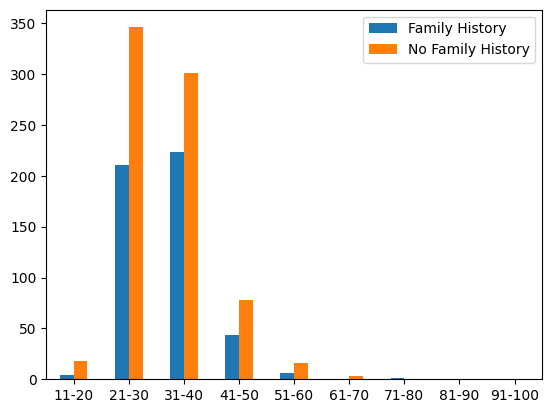

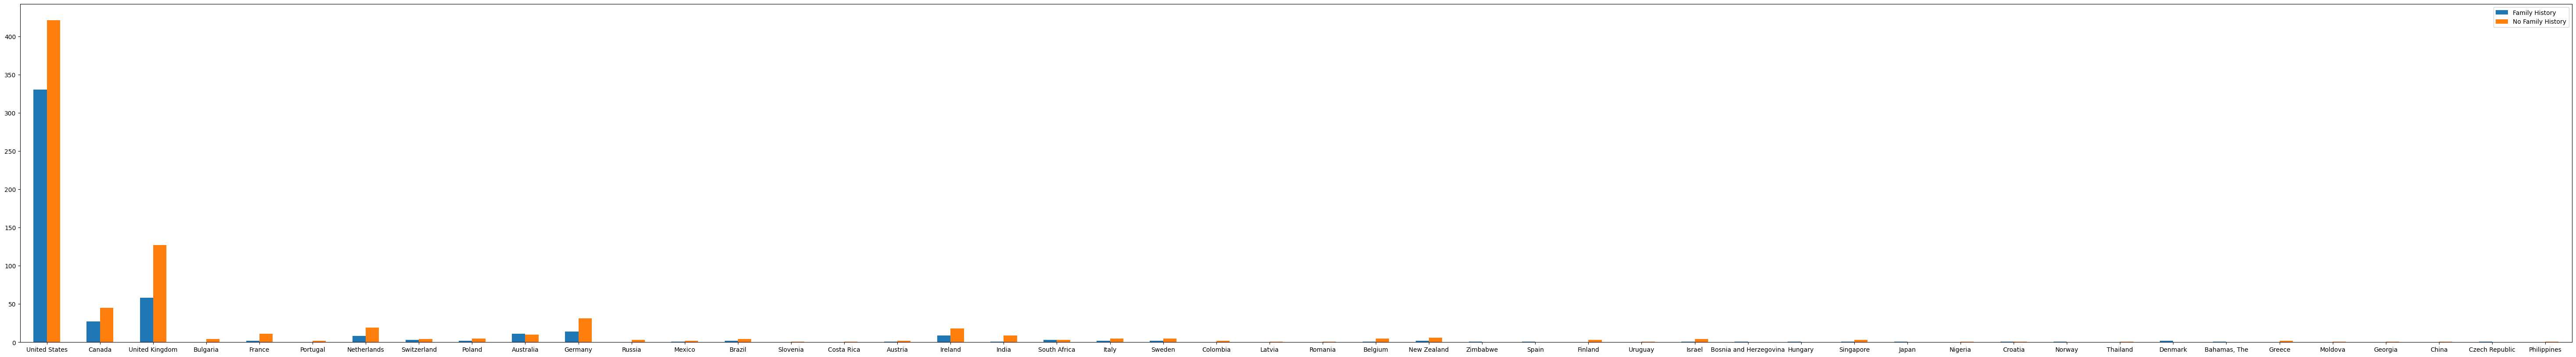

In [59]:
#Create the two bar graphs, upsized if required
ageToFamHistBarGraph = ageToFamHistDf.plot.bar(rot=0)
countryToFamHistBarGraph = countryToFamHistDf.plot.bar(rot=0,figsize=(75,10))

We can see that by far and large, a greater amount of each group (be it age range or country of origin) identify as having no family history of mental illness. This *can* support my research question seen at the beginning of the notebook, but we need more information.

---

# Milestone 4